## IMPORT LIBRARIES :

In [518]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## READ THE DATASET :

In [519]:
df = pd.read_csv('IRIS.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [520]:
## Understanding the data :

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [521]:
df.shape

(150, 5)

## DATA PREPROCESSING :

In [522]:
## Checking Null/Missing Values :

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [523]:
## Checking Duplicates :

df.duplicated().sum()

3

In [524]:
## Removing Duplicates :

df.drop_duplicates(inplace=True)

In [525]:
## Shape of the DataFrame after handling missing and duplicate values

df.shape

(147, 5)

In [526]:
## Checking DataTypes : 

df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Exploratory Data Analysis {EDA} :

In [527]:
## Descriptive Analysis :

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [528]:
df.species.value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [529]:
## Seperate Numerical and Categorical Columns : 

cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print('Cat_Cols => ', cat_cols)
print('Num_Cols => ', num_cols)

Cat_Cols =>  Index(['species'], dtype='object')
Num_Cols =>  Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


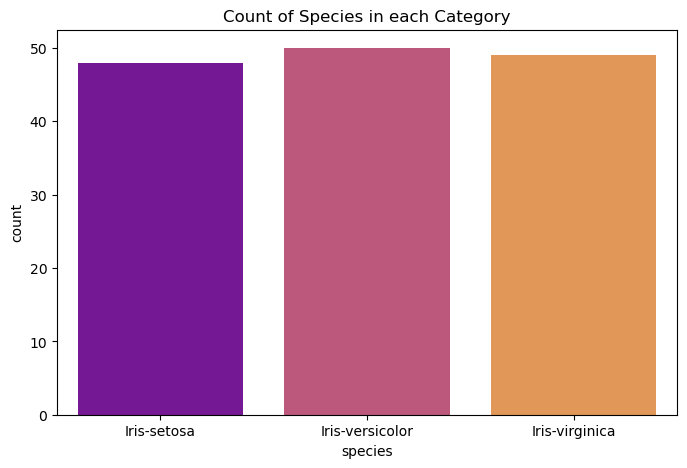

In [530]:
# Plotting the species (categorical) data :

plt.figure(figsize=(8,5))
ax = sns.countplot(x = "species",data=df,palette="plasma")
plt.title('Count of Species in each Category')
plt.show()

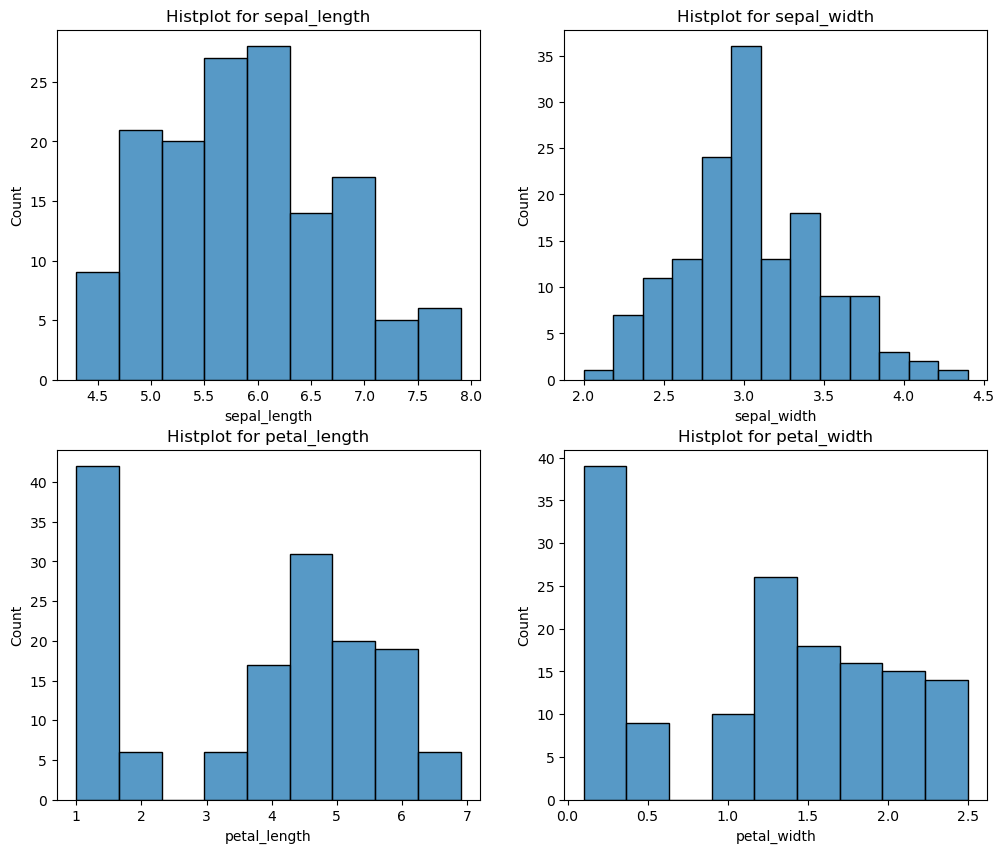

In [531]:
## Plotting the Numerical Columns Data :

plt.figure(figsize=(12,10))
for i in range(len(num_cols)):  
    plt.subplot(2,2,i+1)
    sns.histplot(x=df[num_cols[i]])
    plt.title(f'Histplot for {num_cols[i]}')
plt.show()

#### Bivariate Analysis :

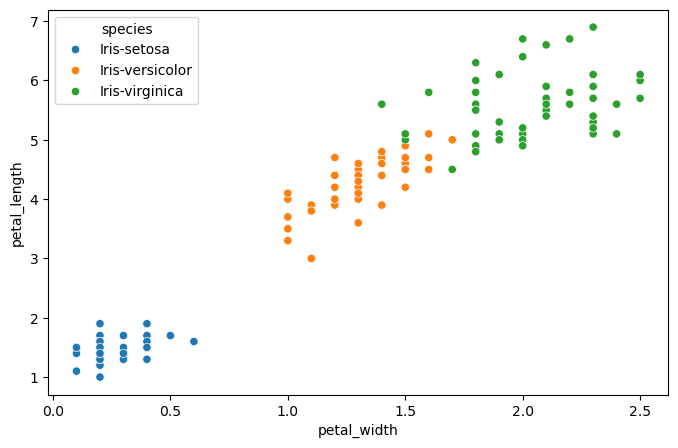

In [532]:
## Scatterplot for petal length and petal width by species :

plt.figure(figsize=(8,5))
sns.scatterplot(x="petal_width",y="petal_length",hue="species",data=df)
plt.show()

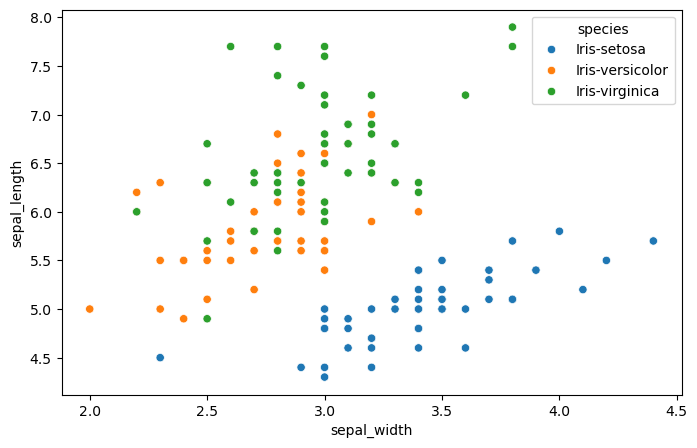

In [533]:
## Scatterplot for sepal length and sepal width by species :

plt.figure(figsize=(8,5))
sns.scatterplot(x="sepal_width",y="sepal_length",hue="species",data=df)
plt.show()

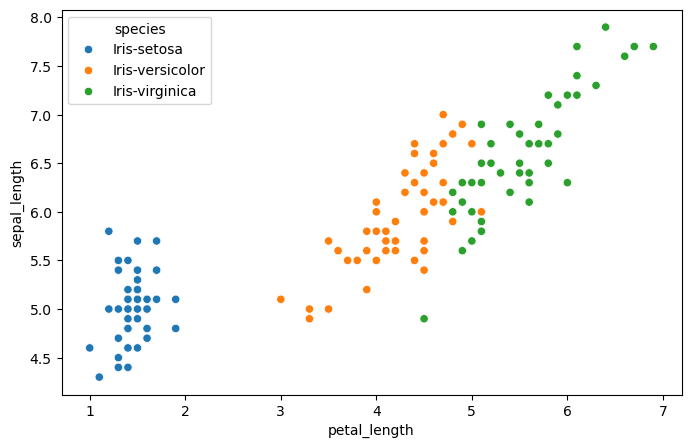

In [534]:
## Scatterplot for sepal length and petal length by species :

plt.figure(figsize=(8,5))
sns.scatterplot(x="petal_length",y="sepal_length",hue="species",data=df)
plt.show()

####  Outliers detection :

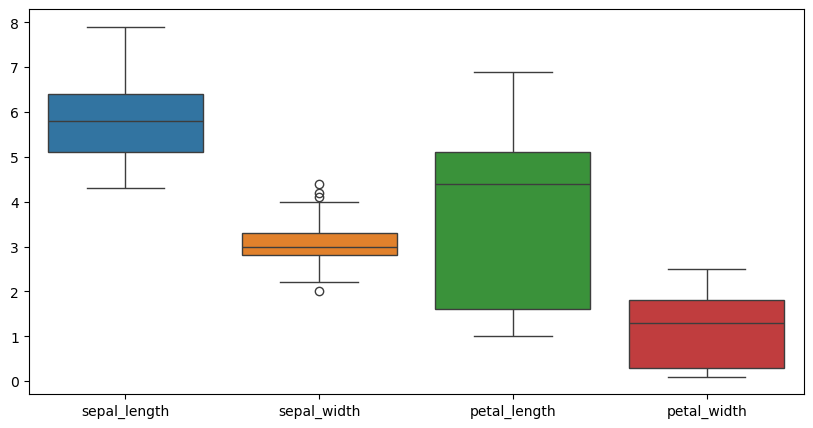

In [535]:
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(df,ax=ax)
plt.show()

##### No Considerable Outliers in the Data..

#### Correlation Analysis :

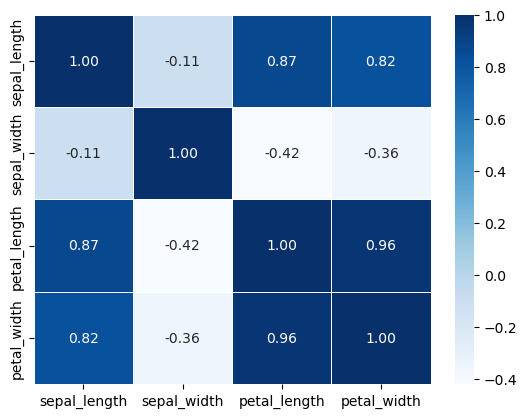

In [536]:
corr_data = df.drop(columns='species').corr()
sns.heatmap(corr_data, annot=True,cmap='Blues',fmt=".2f", linewidth=0.5)
plt.show()

##### This shows relationship of petal_length and petal_width has highly positive correlated(=0.96). sepal_length has highly positive correlation with both petal_width and petal_length which are 0.82 and 0.87 as respectively. sepal_width has moderately negative correlation with both petal_width and petal_length.

## Label Encoder :

In [537]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


##### Iris_setosa -> 0  , Iris_versicolor -> 1 , Iris_virginica -> 2 .

### Seperate X and Y :

In [539]:
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

### Splitting Train & Test Data :

In [540]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (117, 4)
x_test (30, 4)
y_train (117,)
y_test (30,)


### Model Selection
Model Building and Model Evaluation..


### 1.) Logistic Regression Model

In [455]:
lr_model = LogisticRegression()

## Train the model
lr_model.fit(x_train,y_train)

## Making predictions
ypred_lr = lr_model.predict(x_test)

In [456]:
accuracy = accuracy_score(y_test, ypred_lr)
print(f' Accuracy for LR: {accuracy:.4f}\n')

print(classification_report(y_test, ypred_lr))

cf = confusion_matrix(y_test,ypred_lr)
print('Confusion_Matrix \n' ,cf)

 Accuracy for LR: 0.9333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      0.86      0.86         7
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

Confusion_Matrix 
 [[11  0  0]
 [ 0  6  1]
 [ 0  1 11]]


### 2.) K- Nearest Neighbors (KNN) Model

In [541]:
knn_model = KNeighborsClassifier()

## Train the model
knn_model.fit(x_train,y_train)

## Making predictions
ypred_knn = knn_model.predict(x_test)

In [542]:
accuracy1 = accuracy_score(y_test, ypred_knn)
print(f' Accuracy for KNN: {accuracy1:.4f}\n')
print(classification_report(y_test, ypred_knn))

cf1 = confusion_matrix(y_test,ypred_knn)
print('Confusion_Matrix \n' ,cf1)

 Accuracy for KNN: 0.9667

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion_Matrix 
 [[ 7  0  0]
 [ 0 10  1]
 [ 0  0 12]]


### 3.)  Support Vector Machine (SVM) Model 

In [461]:
svm_model = SVC()

## Train the model
svm_model.fit(x_train,y_train)

## Making predictions
ypred_svm = svm_model.predict(x_test)

In [462]:
accuracy2 = accuracy_score(y_test, ypred_svm)
print(f' Accuracy for SVM: {accuracy2:.4f}\n')
print(classification_report(y_test, ypred_svm))

cf2 = confusion_matrix(y_test,ypred_svm)
print('Confusion_Matrix \n' ,cf2)

 Accuracy for SVM: 0.9333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.78      1.00      0.88         7
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30

Confusion_Matrix 
 [[11  0  0]
 [ 0  7  0]
 [ 0  2 10]]


### 4.)  Decision Tree Model

In [463]:
dt_model = DecisionTreeClassifier()

## Train the model
dt_model.fit(x_train,y_train)

## Making predictions
ypred_dt = dt_model.predict(x_test)

In [464]:
accuracy3 = accuracy_score(y_test, ypred_dt)
print(f' Accuracy for DTC: {accuracy3:.4f}\n')
print(classification_report(y_test, ypred_dt))

cf3 = confusion_matrix(y_test,ypred_dt)
print('Confusion_Matrix \n' ,cf3)

 Accuracy for DTC: 0.9000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.75      0.86      0.80         7
           2       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30

Confusion_Matrix 
 [[11  0  0]
 [ 0  6  1]
 [ 0  2 10]]


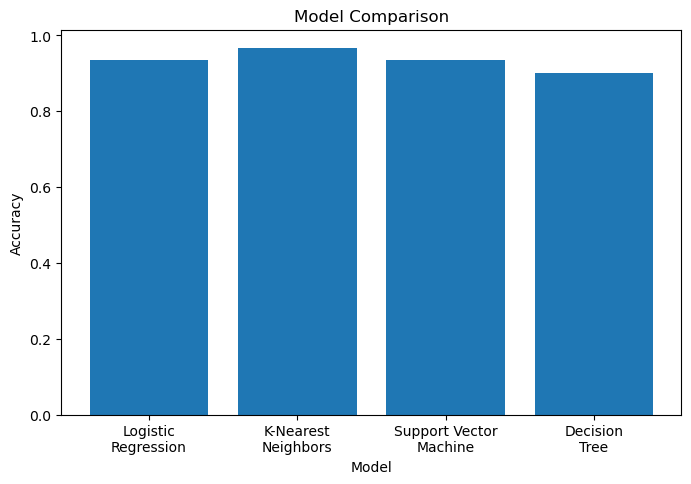

In [544]:
model_names = list(["Logistic\nRegression", "K-Nearest\nNeighbors", "Support Vector\nMachine", "Decision\nTree"])
model_scores = list([accuracy,accuracy1,accuracy2,accuracy3])

fig,ax=plt.subplots(figsize=(8, 5))
ax.bar(model_names,model_scores)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison')
plt.show()